In [33]:
import glacierml as gl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from tqdm import tqdm
pd.set_option('display.max_columns', None)


In [202]:
data = gl.load_notebook_data(coregistration = 'df5')
# data = data.drop(data[data['Lmax'] <= 0].index)
# data = data.drop(data[data['Zmed'] <= 0].index)

In [213]:
data

,RGIId,Edasi Mean Thickness,Edasi Median Thickness,Edasi Thickness Std Dev,Edasi Shapiro-Wilk statistic,Edasi Shapiro-Wilk p_value,Edasi IQR,Edasi Lower Bound,Edasi Upper Bound,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Edasi Volume (km3),Edasi Volume Std Dev (km3),Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3)
0,RGI60-01.00001,76.197774,80.867690,24.609312,0.932986,2.941325e-41,23.988834,22.787887,20.485130,4573.0,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,0.027431,0.008859,19.988910,0.953100,1.411381e-12,22.598288,1.490189,-0.404481,0.007196
1,RGI60-01.00002,88.860023,94.466530,24.492621,0.921486,1.008935e-43,23.855700,29.240617,20.066618,4573.0,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,0.049584,0.013667,29.413269,0.980514,1.595224e-09,31.332405,3.074196,0.050484,0.016413
2,RGI60-01.00003,87.933961,93.638510,23.778644,0.909913,0.000000e+00,21.837576,28.067328,19.222842,4573.0,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,0.148169,0.040067,31.862368,0.944144,9.216613e-31,35.054910,2.878639,-0.390670,0.053688
3,RGI60-01.00004,90.515117,95.904000,23.567138,0.904528,0.000000e+00,20.838740,26.303540,18.687172,4573.0,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,0.333186,0.086751,45.454704,0.969001,8.057077e-34,45.209550,6.697096,0.072549,0.167319
4,RGI60-01.00005,89.609698,94.800780,23.044946,0.921015,8.127531e-44,21.704330,26.182365,18.809805,4573.0,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,0.230566,0.059295,43.040817,0.977176,3.500081e-25,43.682045,6.024213,0.328906,0.110744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215514,RGI60-19.02748,78.158420,85.461480,21.987076,0.740873,0.000000e+00,11.916376,12.866628,14.494825,4567.0,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,0.003283,0.000923,12.593311,0.923319,4.533989e-04,13.539223,1.212544,-1.011952,0.000529
215515,RGI60-19.02749,86.317806,94.380530,24.691499,0.721657,0.000000e+00,12.494367,9.535815,16.133368,4567.0,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,0.048942,0.014000,20.532068,0.972606,4.733442e-12,19.437310,2.341599,0.356173,0.011642
215516,RGI60-19.02750,86.853852,93.776900,21.319073,0.732430,0.000000e+00,10.465430,9.360833,13.794811,4567.0,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,0.357664,0.087792,55.923466,0.977032,2.709829e-31,58.010944,9.158872,0.279736,0.230293
215517,RGI60-19.02751,103.161034,108.443910,20.812573,0.826692,0.000000e+00,15.631908,10.753788,15.677547,4567.0,19,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,0.001135,0.000229,10.181019,0.954263,5.273163e-01,10.175133,0.199121,0.277144,0.000112


In [214]:
diff = data['Edasi Mean Thickness'] - data['Farinotti Mean Thickness']

In [222]:
diff = diff[
    (diff <= 100) &
    (diff >= -100)
]

Text(0.5, 1.0, 'Histogram of Model Residuals')

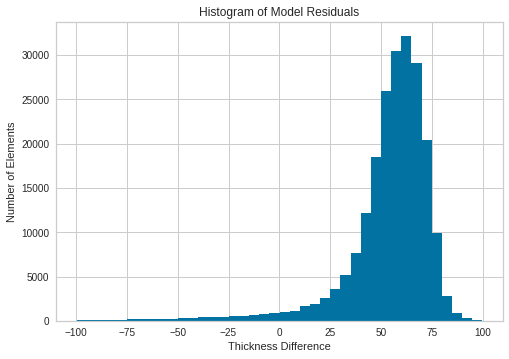

In [223]:
plt.hist(diff, 40)
plt.xlabel('Thickness Difference')
plt.ylabel('Number of Elements')
plt.title('Histogram of Model Residuals')

In [41]:
data['Residual'] = data['Edasi Mean Thickness'] - data['Farinotti Mean Thickness']
# data['RGI Centroid Distance'] = data['RGI Centroid Distance'].str[:-2].astype(float)
# data['RGI Centroid Distance'] = data['RGI Centroid Distance'] * 1e3

data['Area'] = data['Area'] * 1e6     # Put area to meters for radius and roundness calc

# make a guess of an average radius and "roundness" -- ratio of avg radius / width
data['AVG Radius'] = np.sqrt(data['Area'] / np.pi)
data['Roundness'] = (data['AVG Radius']) / (data['Lmax'])
# data['distance test'] = data['RGI Centroid Distance'] / data['AVG Radius']
data['Area'] = data['Area'] / 1e6

In [21]:
data['Area Log'] = np.log(data['Area'])
data['Lmax Log'] = np.log(data['Lmax'])
data['Roundness Log'] = np.log(data['Roundness'])

feat = ['CenLon','CenLat','Slope','Zmin','Zmed',
        'Zmax','Area','Aspect','Lmax', 'Roundness']

/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.01, 'Estimate Residuals against Features')

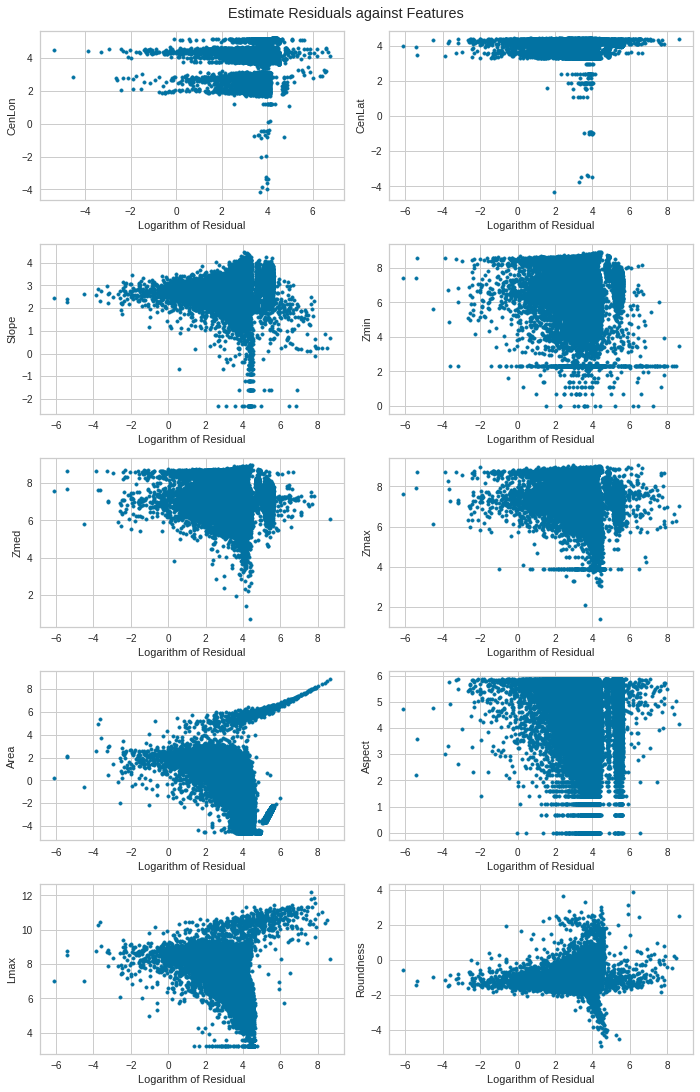

In [44]:
fig = plt.subplots(1,1,figsize = (10,15))

for n, feature in enumerate(feat):
    ax = plt.subplot(5,2,n+1)
    plt.scatter(
        np.log(data['Residual']),
        np.log(data[feature]),
        marker = '.'
    )
    ax.set_ylabel(feature)
    ax.set_xlabel('Logarithm of Residual')
plt.tight_layout()
plt.suptitle('Estimate Residuals against Features',
            y = 1.01)

In [ ]:
far_nhnr = data[data['Farinotti Shapiro-Wilk p_value'] >= 0.05]
far_nhr = data[data['Farinotti Shapiro-Wilk p_value'] <= 0.05]

eal_nhnr = data[data['Edasi Shapiro-Wilk p_value'] >= 0.05]
eal_nhr = data[data['Edasi Shapiro-Wilk p_value'] <= 0.05]


In [ ]:
eal_nhr

In [ ]:
# data = data.drop(data[data['Edasi Mean Thickness'] >= 600].index)

Text(0.5, 1.0, 'E&L Mean Thickness vs Shapiro-Wilk P-value')

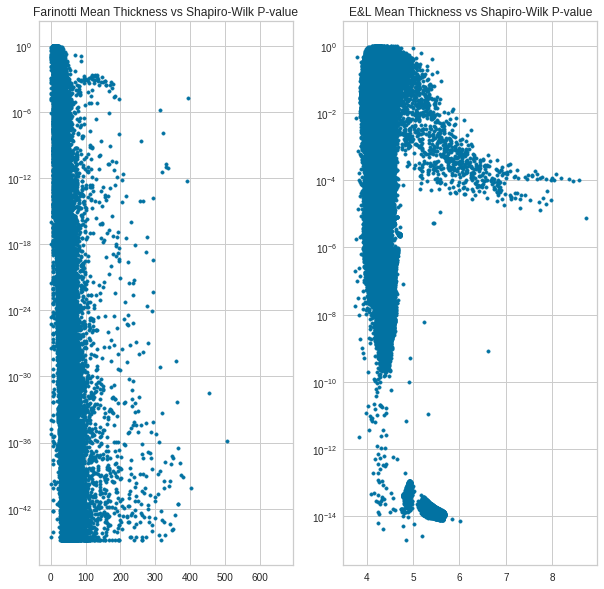

In [191]:
fig, ax = plt.subplots(1,2,figsize = (10,10))
ax[0].scatter(
    (data['Farinotti Mean Thickness']),
    data['Farinotti Shapiro-Wilk p_value'],
    marker = '.'
)
ax[0].set_yscale('log')
ax[0].set_title('Farinotti Mean Thickness vs Shapiro-Wilk P-value')


ax[1].scatter(
    np.log(data['Edasi Mean Thickness']),
    (data['Edasi Shapiro-Wilk p_value']),
    
    marker = '.'
)
# plt.xscale('log')
ax[1].set_yscale('log')
ax[1].set_title('E&L Mean Thickness vs Shapiro-Wilk P-value')


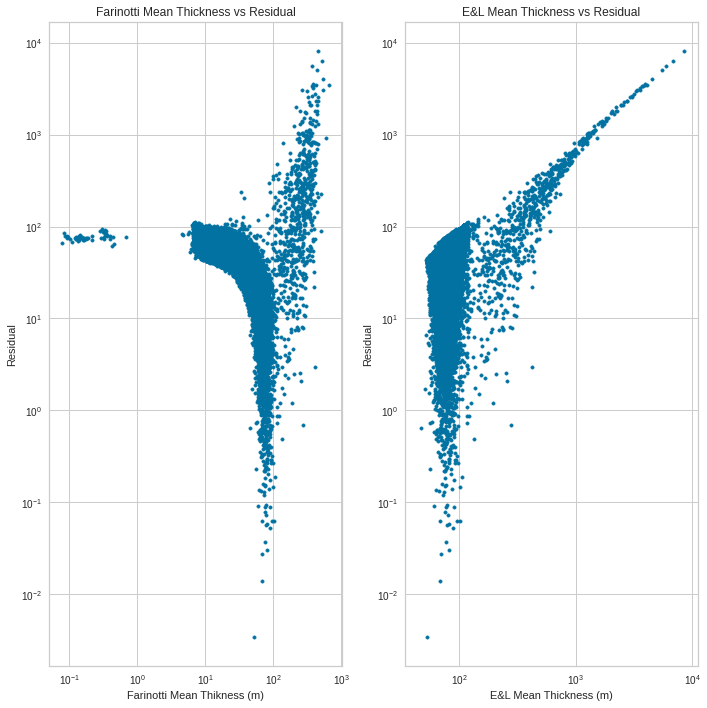

In [54]:
dft = data
#     (data['Slope'] >= 20) 
#     (data['Lmax'] <= 1000)


fig, ax = plt.subplots(1,2,figsize = (10,10))
ax[0].scatter(
    (dft['Farinotti Mean Thickness']),

    dft['Residual'],
    marker = '.'
)
# ax[0].set_yscale('log')
ax[0].set_title('Farinotti Mean Thickness vs Residual')
ax[0].set_xlabel('Farinotti Mean Thikness (m)')
ax[0].set_ylabel('Residual')
ax[0].set_xscale('log')
ax[0].set_yscale('log')


ax[1].scatter(
    (dft['Edasi Mean Thickness']),
    (dft['Residual']),
    
    
    marker = '.'
)
# ax[1].set_yscale('log')
ax[1].set_title('E&L Mean Thickness vs Residual')
ax[1].set_xlabel('E&L Mean Thickness (m)')
ax[1].set_ylabel('Residual')

ax[1].set_xscale('log')
ax[1].set_yscale('log')

plt.tight_layout()

In [163]:
feat = ['Area','Lmax','Slope','Zmin','Zmed','Zmax']
studies = ['Edasi', 'Farinotti']

In [203]:
dft = data.drop(data[data['Edasi Mean Thickness'] >= 500].index)

# dft = data.drop(data[data['Edasi Mean Thickness'] >= 500].index)

/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


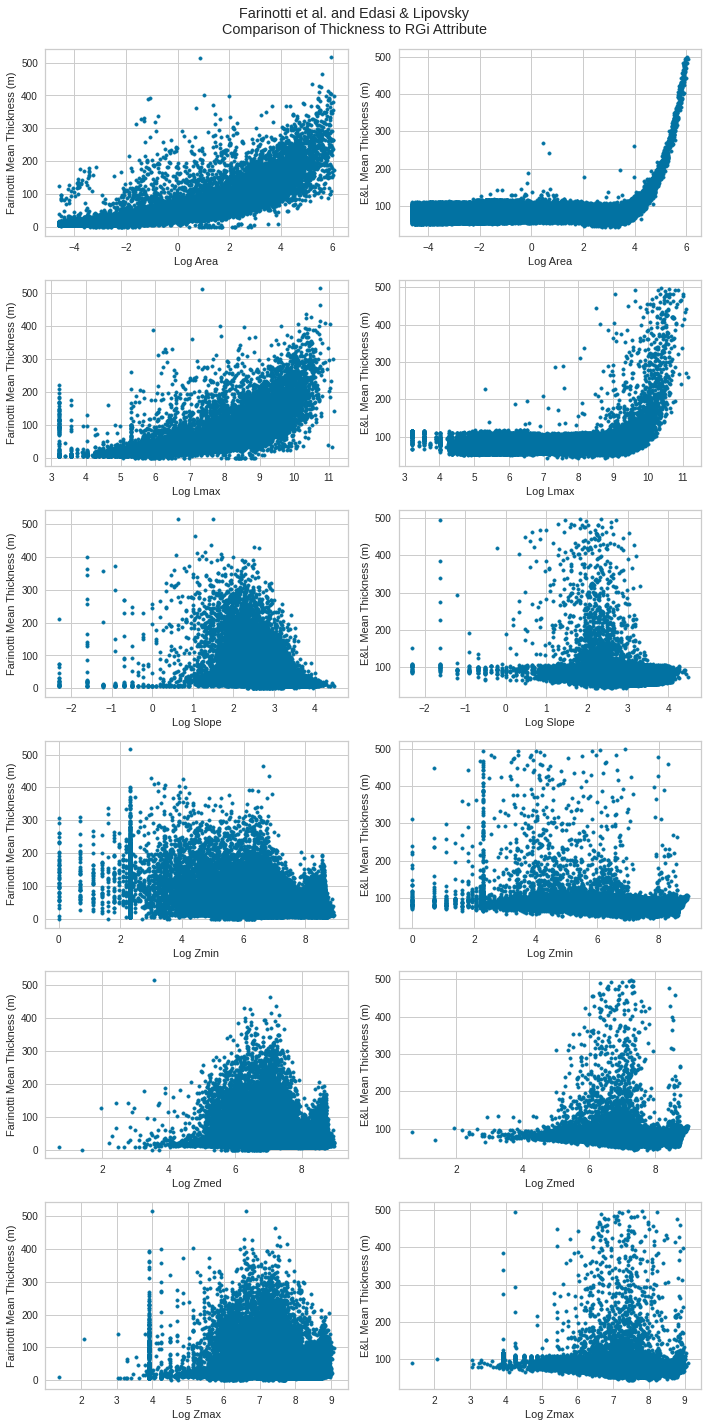

In [208]:
fig, ax = plt.subplots(6,2,figsize = (10,20))

for n, feature in enumerate(feat):

    ax[n,0].scatter(
       
        np.log(dft[feature]),
        (dft['Farinotti Mean Thickness']),
        marker = '.'
    )
    ax[n,1].scatter(
        np.log(dft[feature]),
        (dft['Edasi Mean Thickness']),
        marker = '.'
    )
    ax[n,0].set_ylabel('Farinotti Mean Thickness (m)')
    ax[n,1].set_ylabel('E&L Mean Thickness (m)')
    ax[n,0].set_xlabel('Log ' + feature)
    ax[n,1].set_xlabel('Log ' + feature)
plt.suptitle('Farinotti et al. and Edasi & Lipovsky\n' + 
             'Comparison of Thickness to RGi Attribute', y = 0.99)
plt.tight_layout()

In [ ]:
both_nhr = data[
    (data['Farinotti Shapiro-Wilk p_value'] >= 0.05) &
    (data['Edasi Shapiro-Wilk p_value'] >= 0.05)
]
both_nhnr = data[
    (data['Farinotti Shapiro-Wilk p_value'] <= 0.05) &
    (data['Edasi Shapiro-Wilk p_value'] <= 0.05)
]

In [ ]:
both_nhr

In [ ]:
both_nhnr

In [ ]:
both_nhnr['Area Log'] = np.log(both_nhnr['Area'])
both_nhnr['Lmax Log'] = np.log(both_nhnr['Lmax'])
both_nhnr['Roundness Log'] = np.log(both_nhnr['Roundness'])

feat = ['CenLon','CenLat','Slope','Zmin','Zmed',
        'Zmax','Area Log','Aspect','Lmax Log', 'Roundness Log']

In [187]:
# df1 = data[data['Edasi Shapiro-Wilk p_value'] <= 0.05]
df1 = data
data_1_1 = df1['Farinotti Mean Thickness'] / 1e3 * df1['Area']
vol_f_1 = data_1_1

data_2_1 = df1['Edasi Mean Thickness'] / 1e3 * df1['Area']
vol_e_1 = data_2_1

x_1 = np.sort(data_1_1)
y_1 = 1. * np.arange(len(data_1_1)) / (len(data_1_1) - 1)

x_2 = np.sort(data_2_1)
y_2 = 1. * np.arange(len(data_2_1)) / (len(data_2_1) - 1)

xy = np.vstack([np.log10(vol_f_1),np.log10(vol_e_1)])

xy

array([[-2.14290839, -1.78482251, -1.27012205, ..., -0.63771958,
        -3.95081607, -1.80904095],
       [-1.63442915, -1.36087994, -0.88351509, ..., -0.45554597,
        -2.96420725, -1.37431902]])

In [188]:
f_1 = gaussian_kde(xy)(xy)

In [189]:
bins_x = np.logspace(np.log10(np.min(vol_f_1)), np.log10(np.max(vol_f_1)), 25)
bins_y = np.logspace(np.log10(np.min(vol_e_1)), np.log10(np.max(vol_e_1)), 25)

Drawing scatter plot...
Drawing done
Setting scales and labels...
Saving....


<function matplotlib.pyplot.show(close=None, block=None)>

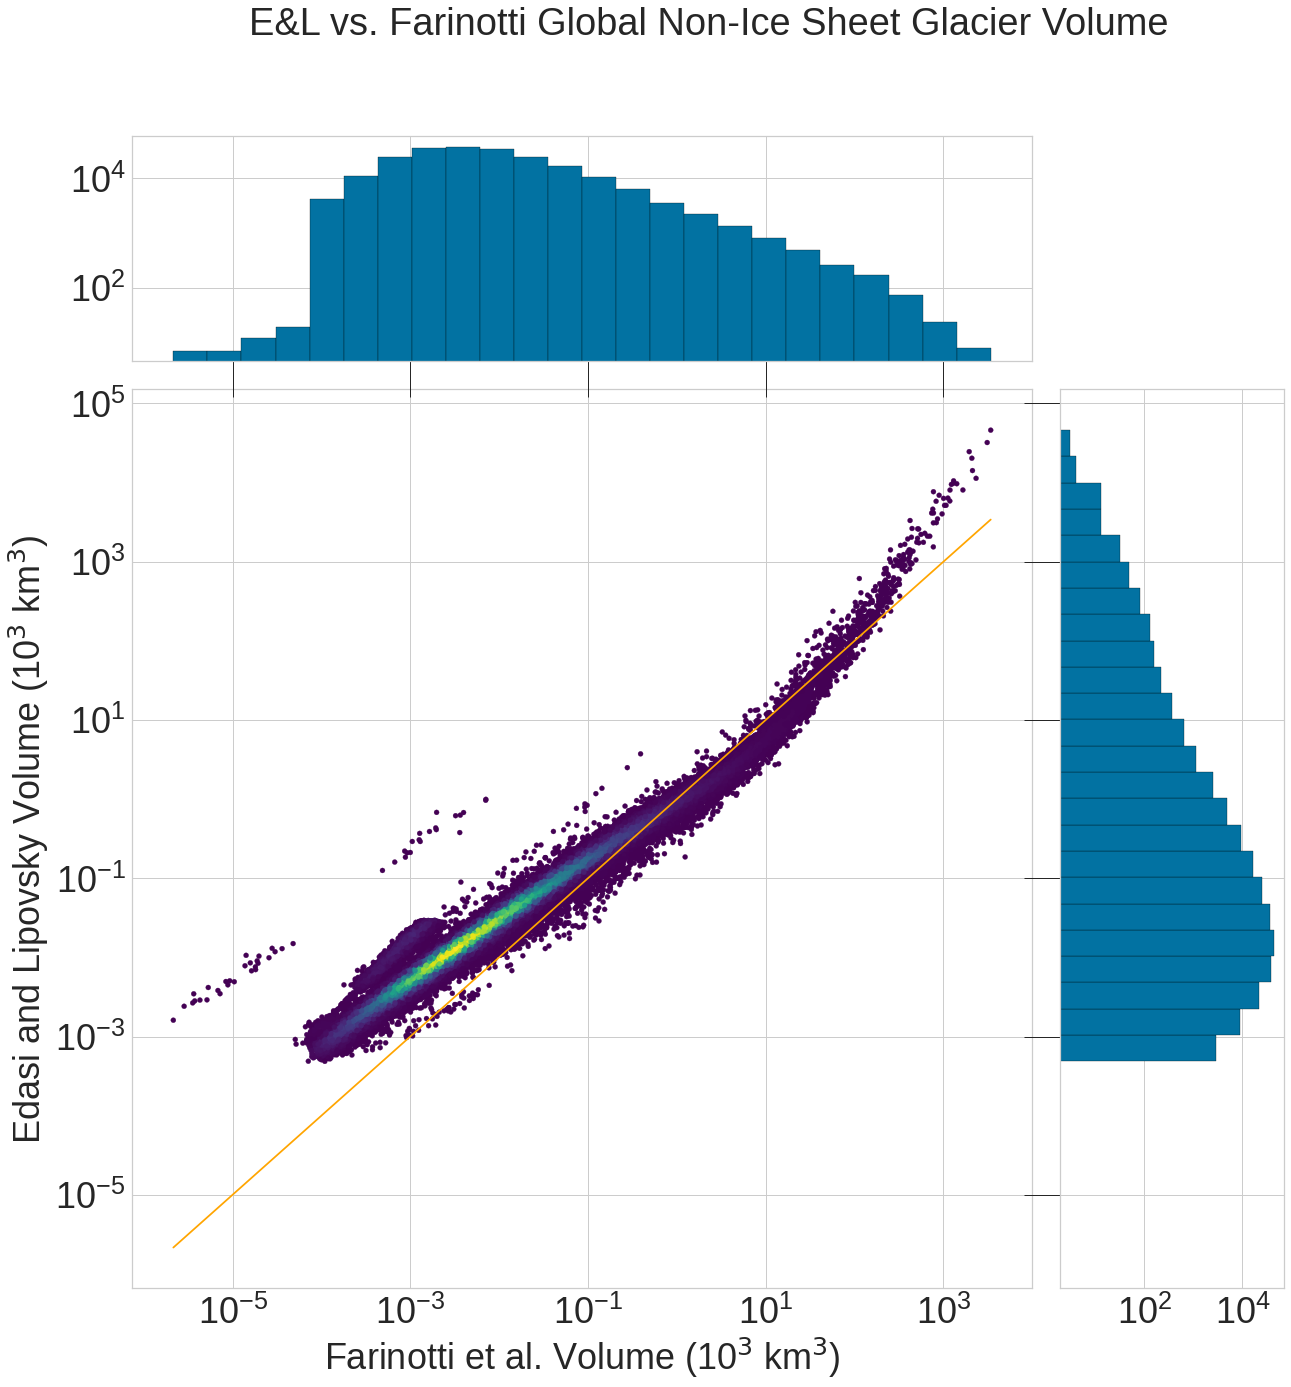

In [190]:
from matplotlib import ticker

def scatter_hist(f_1, vol_f_1, vol_e_1, data_1_1, ax, 
                 ax_histx, ax_histy
                ):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False, size = 36)
    ax_histy.tick_params(axis="y", labelleft=False, size = 36)

    # the scatter plot:
    ax.scatter(vol_f_1, vol_e_1, 
               c = (f_1), 
               s = 100,
               cmap = 'viridis',
               marker = '.'
              )
    ax.plot(
        (data_1_1.min(),data_1_1.max()),
        (data_1_1.min(),data_1_1.max()),
        '-',
        c = 'orange'

    )
    ax_histx.hist(
        (vol_f_1), 
        bins = bins_x,
        edgecolor = 'black',
        log = True
    )
    
    ax_histy.hist(
        (vol_e_1), 
        bins = bins_y, 
        edgecolor = 'black',
        orientation='horizontal',
        log = True
    )
    ax_histx.tick_params(axis="x", labelsize=36)
    ax_histy.tick_params(axis="y", labelsize=36)

    
fig = plt.figure(figsize=(20,20))
plt.suptitle(
    'E&L vs. Farinotti Global Non-Ice Sheet Glacier Volume',
#     'Glaciers With Area <= Median Area\n' ,
#     'Can Reject Null Hypothesis That Glacier Thickness is Normally Distributed',
    y = 0.99, fontsize = 38)
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)


# Create the Axes.

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex = ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey = ax)


ax_histx.tick_params(axis="y", labelsize=36)
ax_histy.tick_params(axis="x", labelsize=36)

ax.tick_params(axis="both", labelsize=36)


# Draw the scatter plot and marginals.
print('Drawing scatter plot...')
scatter_hist(
    f_1,
    vol_f_1, 
    vol_e_1,
    data_1_1,
    ax, 
    ax_histx,
    ax_histy,
)

print('Drawing done')
print('Setting scales and labels...')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Edasi and Lipovsky Volume (10$^3$ km$^3$)', fontsize = 36)
ax.set_xlabel('Farinotti et al. Volume (10$^3$ km$^3$)', fontsize = 36)
# ax.set_ylim(10**-4, 10**5)
# ax.set_xlim(10**-6, 10**4)

print('Saving....')
plt.show
# plt.savefig('figs/scatter/scatter_hist_df8.eps')
# plt.savefig('figs/scatter/scatter_hist_df8.svg')
# plt.savefig('figs/scatter/scatter_hist_df8.png')
# plt.savefig('figs/scatter/test.svg')


In [209]:
df2 = data[data['Edasi Shapiro-Wilk p_value'] <= 0.05]

data_1_2 = df2['Farinotti Mean Thickness'] / 1e3 * df2['Area']
vol_f_2 = data_1_2

data_2_2 = df2['Edasi Mean Thickness'] / 1e3 * df2['Area']
vol_e_2 = data_2_2
x_1_2 = np.sort(data_1_1)
y_1_2 = 1. * np.arange(len(data_1_2)) / (len(data_1_2) - 1)

x_2_2 = np.sort(data_2_2)
y_2_2 = 1. * np.arange(len(data_2_2)) / (len(data_2_2) - 1)

ab = np.vstack([np.log10(vol_f_2),np.log10(vol_e_2)])

In [210]:
f_2 = gaussian_kde(ab)(ab)

In [211]:
bins_x = np.logspace(
    np.log10(np.min(vol_f_2)), np.log10(np.max(vol_f_2)), 25)
bins_y = np.logspace(
    np.log10(np.min(vol_e_2)), np.log10(np.max(vol_e_2)), 25)

Drawing scatter plot...
Drawing done
Setting scales and labels...
Saving....


<function matplotlib.pyplot.show(close=None, block=None)>

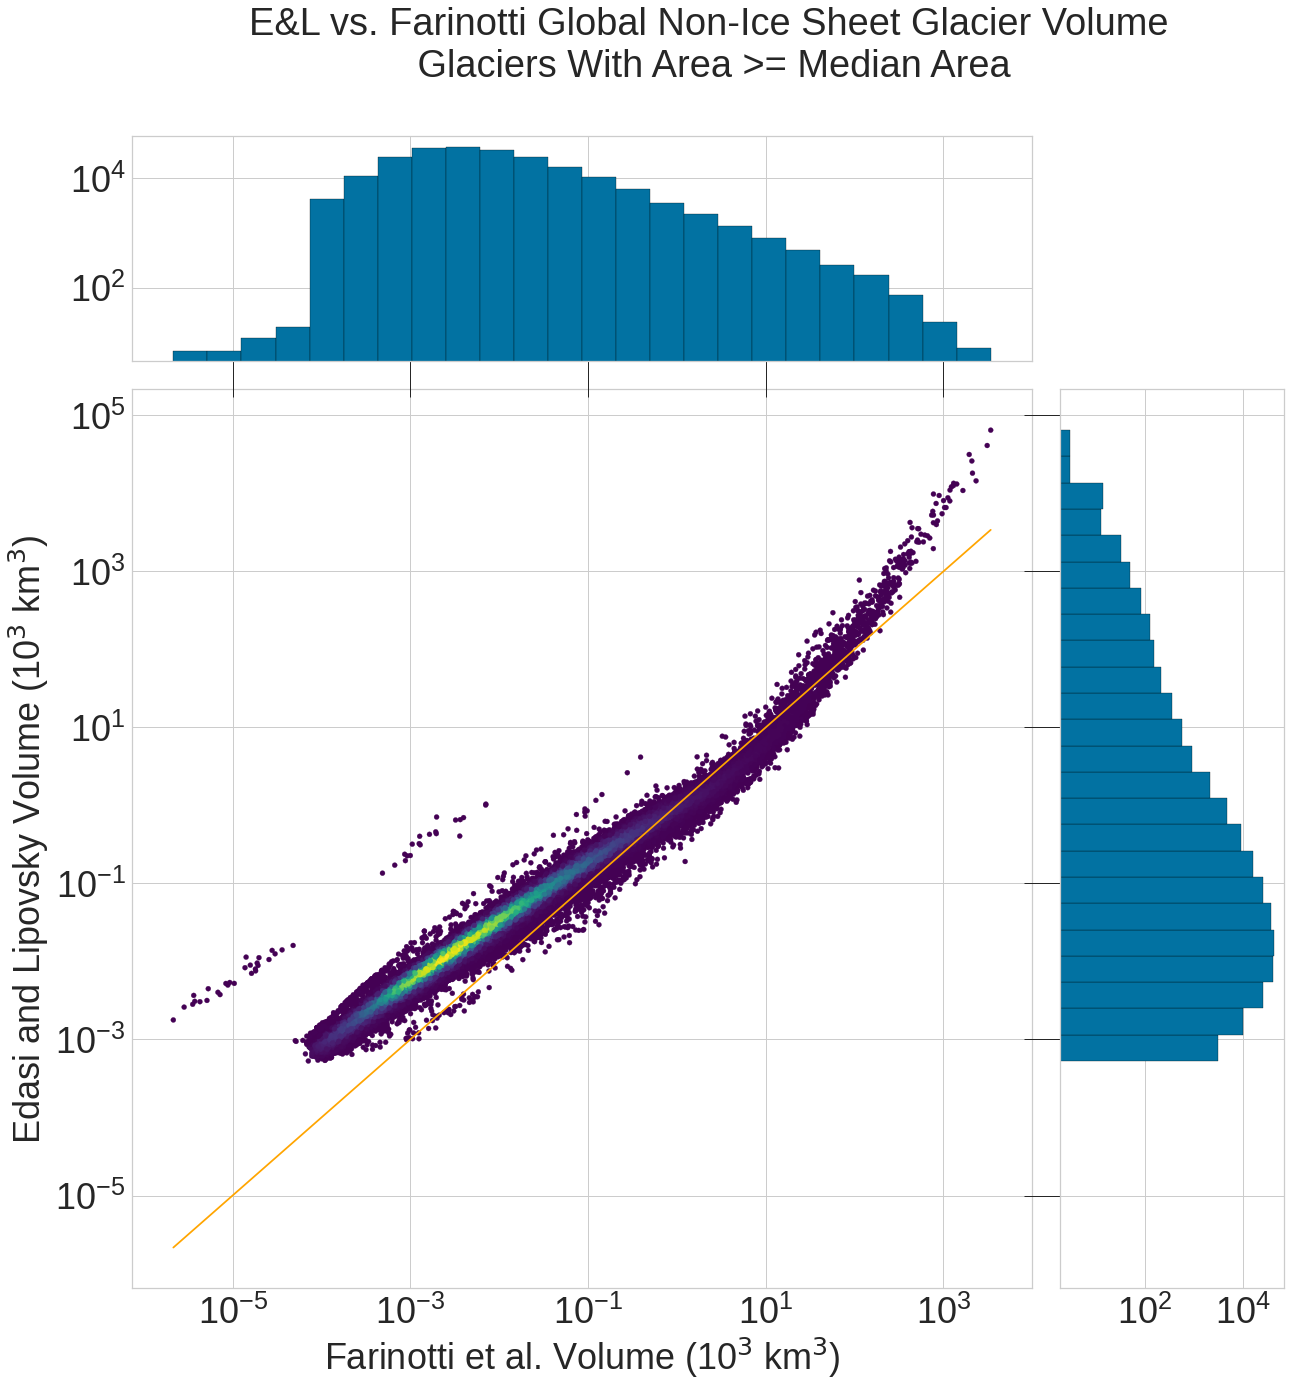

In [212]:
fig = plt.figure(figsize=(20,20))
plt.suptitle(
    'E&L vs. Farinotti Global Non-Ice Sheet Glacier Volume\n ' +
    'Glaciers With Area >= Median Area\n' ,
#     'Cannot Reject Null Hypothesis That Glacier Thickness is Normally Distributed',
    y = 0.99, fontsize = 38)
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)


# Create the Axes.

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex = ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey = ax)


ax_histx.tick_params(axis="y", labelsize=36)
ax_histy.tick_params(axis="x", labelsize=36)

ax.tick_params(axis="both", labelsize=36)


# Draw the scatter plot and marginals.
print('Drawing scatter plot...')
scatter_hist(
    f_2,
    vol_f_2, 
    vol_e_2,
        data_1_2,
    ax, 

    ax_histx,
    ax_histy,
)

print('Drawing done')
print('Setting scales and labels...')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Edasi and Lipovsky Volume (10$^3$ km$^3$)', fontsize = 36)
ax.set_xlabel('Farinotti et al. Volume (10$^3$ km$^3$)', fontsize = 36)
# ax.set_xlim(10**-6, 10**-1)
# ax.set_ylim(10**-4, 10**-1)

print('Saving....')
plt.show
# plt.savefig('figs/scatter/scatter_hist_df8.eps')
# plt.savefig('figs/scatter/scatter_hist_df8.svg')
# plt.savefig('figs/scatter/scatter_hist_df8.png')
# plt.savefig('figs/scatter/test.svg')
